In [1]:
import os
import pickle
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [6]:
DATA_DIR = 'C:/Users/Turbo/Desktop/final_data_npy'
actions = []
for dir_ in os.listdir(DATA_DIR):
    actions.append(dir_)
actions 

['Act',
 'Alhamdullah',
 'all',
 'Baba',
 'Basis',
 'because',
 'Boy',
 'Brave',
 'calls',
 'calm',
 'College',
 'Confused',
 'conversation',
 'Crying',
 'daily',
 'danger',
 'disagree with',
 'drinks',
 'Eats',
 'effort',
 'Egypt',
 'Enters',
 'Excelent',
 'explanation',
 'Fasting',
 'Female',
 'First',
 'For Us',
 'fuel',
 'Gift',
 'Girl',
 'Glass',
 'good bye',
 'government',
 'Happy',
 'hates',
 'hears',
 'Help',
 'Here You Are',
 'how_are_u',
 'Humanity',
 'hungry',
 'I',
 'ignorance',
 'immediately',
 'Important',
 'Intelligent',
 'Last',
 'leader',
 'Liar',
 'Loves',
 'male',
 'Mama',
 'memory',
 'model',
 'mostly',
 'motive',
 'Muslim',
 'must',
 'my home land',
 'no',
 'nonsense',
 'obvious',
 'Old',
 'Palestine',
 'prevent',
 'ready',
 'rejection',
 'Right',
 'selects',
 'shut up',
 'Sing',
 'sleeps',
 'smells',
 'Somkes',
 'Spoon',
 'Summer',
 'symposium',
 'Tea',
 'teacher',
 'terrifying',
 'Thanks',
 'time',
 'to boycott',
 'to cheer',
 'to go',
 'to live',
 'to spread',
 

In [7]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'Act': 0,
 'Alhamdullah': 1,
 'all': 2,
 'Baba': 3,
 'Basis': 4,
 'because': 5,
 'Boy': 6,
 'Brave': 7,
 'calls': 8,
 'calm': 9,
 'College': 10,
 'Confused': 11,
 'conversation': 12,
 'Crying': 13,
 'daily': 14,
 'danger': 15,
 'disagree with': 16,
 'drinks': 17,
 'Eats': 18,
 'effort': 19,
 'Egypt': 20,
 'Enters': 21,
 'Excelent': 22,
 'explanation': 23,
 'Fasting': 24,
 'Female': 25,
 'First': 26,
 'For Us': 27,
 'fuel': 28,
 'Gift': 29,
 'Girl': 30,
 'Glass': 31,
 'good bye': 32,
 'government': 33,
 'Happy': 34,
 'hates': 35,
 'hears': 36,
 'Help': 37,
 'Here You Are': 38,
 'how_are_u': 39,
 'Humanity': 40,
 'hungry': 41,
 'I': 42,
 'ignorance': 43,
 'immediately': 44,
 'Important': 45,
 'Intelligent': 46,
 'Last': 47,
 'leader': 48,
 'Liar': 49,
 'Loves': 50,
 'male': 51,
 'Mama': 52,
 'memory': 53,
 'model': 54,
 'mostly': 55,
 'motive': 56,
 'Muslim': 57,
 'must': 58,
 'my home land': 59,
 'no': 60,
 'nonsense': 61,
 'obvious': 62,
 'Old': 63,
 'Palestine': 64,
 'prevent': 65,
 

In [8]:
temp_labels = np.array(actions)
temp_labels.shape[0]

100

In [9]:
sequence_length = 30
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_DIR, action))).astype(int):
        window = []
        for frame_num in range(1,30,2):
            res = np.load(os.path.join(DATA_DIR, action, str(sequence), "{}.npy".format(frame_num))) 
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [10]:
X = np.array(sequences)
print(X.shape)

(26100, 15, 84)


In [11]:
import tensorflow.keras.utils as tf_utils
y = tf_utils.to_categorical(labels).astype(int)
print(y.shape)

(26100, 100)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [13]:
import tensorflow as tf
class StopOnAccuracy(tf.keras.callbacks.Callback):
    def __init__(self, target_acc):
        self.target_acc = target_acc

    def on_epoch_end(self, epoch, logs=None):
        if logs['categorical_accuracy'] >= self.target_acc:
            print("\nReached target accuracy, stopping training...")
            self.model.stop_training = True

Epoch 1/700
653/653 [==============================] - 18s 20ms/step - loss: 3.6021 - categorical_accuracy: 0.0765
Epoch 2/700
653/653 [==============================] - 14s 21ms/step - loss: 2.3881 - categorical_accuracy: 0.2491
Epoch 3/700
653/653 [==============================] - 14s 21ms/step - loss: 1.8400 - categorical_accuracy: 0.3907
Epoch 4/700
653/653 [==============================] - 14s 21ms/step - loss: 1.4796 - categorical_accuracy: 0.5087
Epoch 5/700
653/653 [==============================] - 14s 21ms/step - loss: 1.2077 - categorical_accuracy: 0.6013
Epoch 6/700
653/653 [==============================] - 14s 21ms/step - loss: 1.0472 - categorical_accuracy: 0.6570
Epoch 7/700
653/653 [==============================] - 14s 21ms/step - loss: 0.9223 - categorical_accuracy: 0.7026
Epoch 8/700
653/653 [==============================] - 14s 21ms/step - loss: 0.8142 - categorical_accuracy: 0.7427
Epoch 9/700
653/653 [==============================] - 14s 21ms/step - loss: 0.7

653/653 [==============================] - 14s 21ms/step - loss: 0.1202 - categorical_accuracy: 0.9723
Epoch 72/700
653/653 [==============================] - 14s 21ms/step - loss: 0.1285 - categorical_accuracy: 0.9695
Epoch 73/700
653/653 [==============================] - 14s 21ms/step - loss: 0.0924 - categorical_accuracy: 0.9795
Epoch 74/700
653/653 [==============================] - 14s 21ms/step - loss: 0.1152 - categorical_accuracy: 0.9720
Epoch 75/700
653/653 [==============================] - 14s 21ms/step - loss: 0.1135 - categorical_accuracy: 0.9727
Epoch 76/700
653/653 [==============================] - 14s 21ms/step - loss: 0.0974 - categorical_accuracy: 0.9767
Epoch 77/700
653/653 [==============================] - 14s 21ms/step - loss: 0.0970 - categorical_accuracy: 0.9775
Epoch 78/700
653/653 [==============================] - 14s 21ms/step - loss: 0.1040 - categorical_accuracy: 0.9762
Epoch 79/700
653/653 [==============================] - 14s 21ms/step - loss: 0.1129 

653/653 [==============================] - 14s 21ms/step - loss: 0.0629 - categorical_accuracy: 0.9873
Epoch 142/700
653/653 [==============================] - 14s 21ms/step - loss: 0.0692 - categorical_accuracy: 0.9843
Epoch 143/700
653/653 [==============================] - 14s 21ms/step - loss: 0.0693 - categorical_accuracy: 0.9845
Epoch 144/700
653/653 [==============================] - 14s 21ms/step - loss: 0.0542 - categorical_accuracy: 0.9886
Epoch 145/700
653/653 [==============================] - 14s 21ms/step - loss: 0.0760 - categorical_accuracy: 0.9824
Epoch 146/700
653/653 [==============================] - 14s 21ms/step - loss: 0.0777 - categorical_accuracy: 0.9844
Epoch 147/700
653/653 [==============================] - 14s 21ms/step - loss: 0.0733 - categorical_accuracy: 0.9839
Epoch 148/700
653/653 [==============================] - 14s 21ms/step - loss: 0.0538 - categorical_accuracy: 0.9892
Epoch 149/700
653/653 [==============================] - 14s 21ms/step - loss:

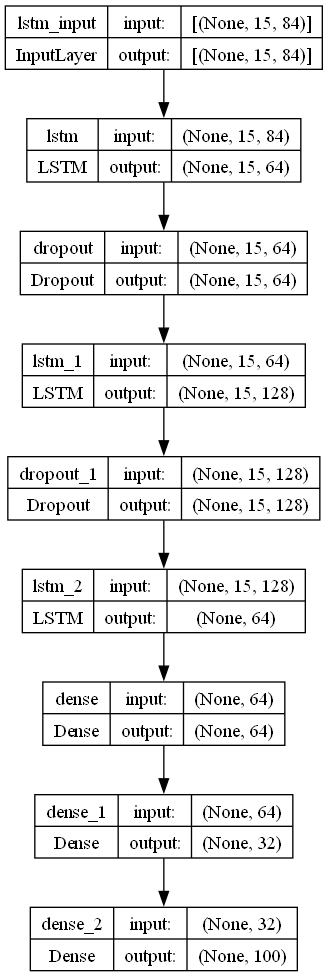

In [14]:
from tensorflow import keras
from keras.utils import plot_model
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, GRU

model = Sequential()

model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(15,84)))
model.add(Dropout(0.4)) 
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(Dropout(0.2)) 
model.add(LSTM(64, return_sequences=False, activation='relu'))

# model.add(GRU(64, return_sequences=True, activation='relu', input_shape=(15,84)))
# model.add(Dropout(0.4)) 
# model.add(GRU(128, return_sequences=True, activation='relu'))
# model.add(Dropout(0.2)) 
# model.add(GRU(64, return_sequences=False, activation='relu'))

model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001))) 
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001))) 
model.add(Dense(temp_labels.shape[0], activation='softmax'))

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
stop_on_acc = StopOnAccuracy(0.99)  # Stop if validation accuracy reaches 99%
# history = model.fit(X_train, y_train,
#                     validation_data=(X_val, y_val),
#                     epochs=2000,
#                     callbacks=[stop_on_acc])
model.fit(X_train, y_train, epochs=700 ,callbacks=[stop_on_acc])
model.summary()

# Create a graphical representation of the model architecture
keras.utils.plot_model(model, to_file='model_architecture.png', show_shapes=True)


In [15]:
model.save('action3.h5')
model.load_weights('action3.h5')

C:\Users\Turbo\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [16]:
from keras.models import load_model

# Path to your saved model file (.h5 format)

# Load the model
# modelGRU = load_model("action2.h5")
modelLSTM =  load_model("action3.h5")

In [25]:
# from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
# from sklearn.metrics import precision_recall_fscore_support

# yhat = modelGRU.predict(X_test)
# ytrue = np.argmax(y_test, axis=1).tolist()
# yhat = np.argmax(yhat, axis=1).tolist()
# multilabel_confusion_matrix(ytrue, yhat)


164/164 [==============================] - 2s 7ms/step


array([[[5180,    0],
        [   0,   40]],

       [[5151,    0],
        [   0,   69]],

       [[5179,    0],
        [   0,   41]],

       [[5176,    2],
        [   0,   42]],

       [[5175,    0],
        [   0,   45]],

       [[5171,    0],
        [   0,   49]],

       [[5176,    1],
        [   0,   43]],

       [[5170,    0],
        [   0,   50]],

       [[5160,    0],
        [   1,   59]],

       [[5171,    0],
        [   0,   49]],

       [[5148,    0],
        [   0,   72]],

       [[5175,    0],
        [   0,   45]],

       [[5172,    0],
        [   0,   48]],

       [[5160,    0],
        [   0,   60]],

       [[5153,    0],
        [   0,   67]],

       [[5174,    0],
        [   0,   46]],

       [[5165,    0],
        [   1,   54]],

       [[5171,    0],
        [   1,   48]],

       [[5165,    0],
        [   1,   54]],

       [[5173,    1],
        [   1,   45]],

       [[5174,    0],
        [   0,   46]],

       [[5159,    0],
        [   

In [26]:
# from sklearn.metrics import recall_score

# # Assuming y_true and y_pred are your true and predicted labels respectively
# # Calculate recall
# recall = recall_score(ytrue, yhat, average='macro')  # Change 'macro' to 'micro' or 'weighted' if needed
# print("Recall:", recall)

Recall: 0.9967551234800647


In [27]:
# from sklearn.metrics import precision_score

# # Assuming y_true and y_pred are your true and predicted labels respectively
# # Calculate precision
# precision = precision_score(ytrue, yhat, average='macro')  # Change 'macro' to 'micro' or 'weighted' if needed
# print("Precision:", precision)

Precision: 0.9969855023432665


In [28]:
# from sklearn.metrics import f1_score

# # Assuming y_true and y_pred are your true and predicted labels respectively
# # Calculate F1 score
# f1 = f1_score(ytrue, yhat, average='macro')  # Change 'macro' to 'micro' or 'weighted' if needed
# print("F1 Score:", f1)

F1 Score: 0.996795360577872


In [29]:
# GRU_ACC= accuracy_score(ytrue, yhat)
# print("Accuracy", GRU_ACC)

Accuracy 0.9971264367816092


In [17]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

yhat = modelLSTM.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)


164/164 [==============================] - 2s 9ms/step


array([[[5180,    0],
        [   1,   39]],

       [[5149,    2],
        [   1,   68]],

       [[5177,    2],
        [   1,   40]],

       [[5178,    0],
        [   0,   42]],

       [[5173,    2],
        [   0,   45]],

       [[5171,    0],
        [   0,   49]],

       [[5177,    0],
        [   0,   43]],

       [[5170,    0],
        [   0,   50]],

       [[5159,    1],
        [   1,   59]],

       [[5171,    0],
        [   0,   49]],

       [[5144,    4],
        [   0,   72]],

       [[5173,    2],
        [   0,   45]],

       [[5172,    0],
        [   1,   47]],

       [[5159,    1],
        [   0,   60]],

       [[5153,    0],
        [   1,   66]],

       [[5174,    0],
        [   0,   46]],

       [[5162,    3],
        [   0,   55]],

       [[5171,    0],
        [   1,   48]],

       [[5165,    0],
        [   1,   54]],

       [[5173,    1],
        [   7,   39]],

       [[5174,    0],
        [   8,   38]],

       [[5155,    4],
        [   

In [18]:
from sklearn.metrics import recall_score

# Assuming y_true and y_pred are your true and predicted labels respectively
# Calculate recall
recall = recall_score(ytrue, yhat, average='macro')  # Change 'macro' to 'micro' or 'weighted' if needed
print("Recall:", recall)

Recall: 0.9806259980029162


In [19]:
from sklearn.metrics import precision_score

# Assuming y_true and y_pred are your true and predicted labels respectively
# Calculate precision
precision = precision_score(ytrue, yhat, average='macro')  # Change 'macro' to 'micro' or 'weighted' if needed
print("Precision:", precision)

Precision: 0.9816367830429711


In [20]:
from sklearn.metrics import f1_score

# Assuming y_true and y_pred are your true and predicted labels respectively
# Calculate F1 score
f1 = f1_score(ytrue, yhat, average='macro')  # Change 'macro' to 'micro' or 'weighted' if needed
print("F1 Score:", f1)

F1 Score: 0.9803662841916294


In [21]:
LSTM_ACC= accuracy_score(ytrue, yhat)
print("Accuracy", LSTM_ACC)

Accuracy 0.9808429118773946
